# Fully discretized

Inclination =  horizontal
INFO: case1 horizontal unstable (Sanderse et al., 2017)
Diameter =  0.078
Validation =  KH instabilities based (Sanderse et al., 2017)
Equation system : system_2 , case : case1 , configuration : horizontal
 
 
INFO: j_l =  0.5
INFO: j_g =  6.908
 
INFO: var1_ref =  0.5025362575435522 [-]
INFO: var2_ref =  0.9949530854630276 [m/s]
INFO: var3_ref =  13.886439172207181 [m/s]
INFO: var4_ref =  100000.0 [Pa]
 
INFO: Rel_ref  =  87418.81002345447 [-]
INFO: Reg_ref  =  42552.22299749324 [-]
 
Re [lambda] = [307.4743570429938, -279.73181031047227, 0.6843971556531409, 1.335840627163042]
Im [lambda] = [0.0, 0.0, 0.0, 0.0]
 
max (Re [lambda]) = 307.4743570429938
 
INFO: well-posed
 
Re [omega] = [1931.9123022908766, -1757.6007319385437, 4.284156266783156, 8.40936374839628]
Im [omega] = [4.693606622529955, 4.709928806919261, 0.40349262809881825, -0.16272491250730126]
 
INFO: VKH unstable
 
r = [[ 0.54112738-0.84093552j  0.9513957 +0.30795717j -0.41883176+0.90575463j
   0.

<Figure size 576x288 with 0 Axes>

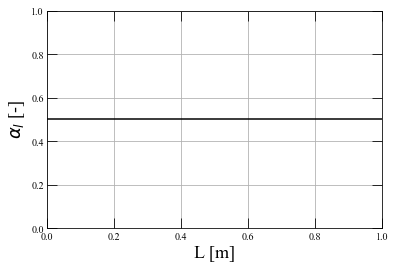

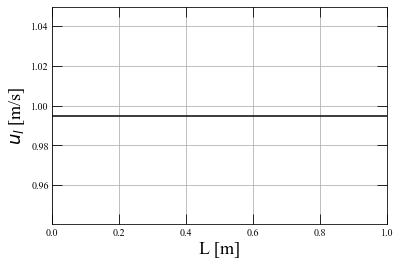

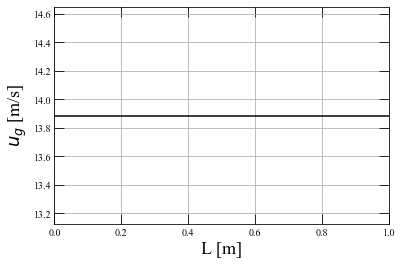

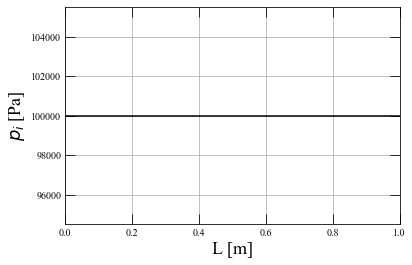

In [1]:
# Import libraries
%run ./00_libraries.ipynb
%run ./01_constants_codes.ipynb
%run ./02_constants_test_cases.ipynb

%run ./05_C_testcases.ipynb
%run ./06_testcases_conditions.ipynb
%run ./07_equations_functions.ipynb
%run ./08_equations_matrices.ipynb

%run ./10_stability_functions.ipynb
%run ./11_reference_conditions.ipynb

%run ./18_fem_discretization.ipynb
%run ./19_initial_boundary_conditions.ipynb
%run ./20_variational_form.ipynb
%run ./21_solvers.ipynb

# %run ./24_fully_discretized.ipynb
# %run ./25_von_neumann.ipynb
# %run ./26_disc_maps.ipynb

In [ ]:
if simulation == "linear_simulation":
    if any ([system == "system_1", system == "system_2"]):   
        # L2 norm for each time step
        L2norm_variable1 = []
        L2norm_variable2 = []
        L2norm_variable3 = []
        L2norm_variable4 = []

        # Time vector for L2 norm computation
        timevector = np.linspace(0, T, num_steps)

        # Step in time
        t = 0
        while (t < T):
            # Condition for Dirichlet boundary conditions
            if IBVP == 'SS_perturbed':
                variable1_dirichlet.timedirichlet = t
                variable2_dirichlet.timedirichlet = t
                variable3_dirichlet.timedirichlet = t
                variable4_dirichlet.timedirichlet = t
            else:
                pass

    # ===============================================================
    # CURRENT TIME BDF1
    # ===============================================================
            if time_method == 'BDF1':
                # Method
                print ('INFO: BDF1')

                # Initial conditions
                if t == 0:
                    (variable1_n, variable2_n, variable3_n, variable4_n) = variable_n.split (deepcopy = True)
                    # Compute  nodal values (initial)
                    n_val1_n = np.array (variable1_n.vector ())
                    n_val2_n = np.array (variable2_n.vector ())
                    n_val3_n = np.array (variable3_n.vector ())
                    n_val4_n = np.array (variable4_n.vector ())

                    nodal_variable1_n = n_val1_n [::-1]
                    nodal_variable2_n = n_val2_n [::-1]
                    nodal_variable3_n = n_val3_n [::-1]
                    nodal_variable4_n = n_val4_n [::-1]

                    # print ("n", nodal_variable1_n)

                    nodes_variable1_n = len (nodal_variable1_n)
                    nodes_variable2_n = len (nodal_variable2_n)
                    nodes_variable3_n = len (nodal_variable3_n)
                    nodes_variable4_n = len (nodal_variable4_n)

                    # print ("dof subspace variable1 =", nodes_variable1_n)
                    # print ("dof subspace variable2 =", nodes_variable2_n)
                    # print ("dof subspace variable3 =", nodes_variable3_n)
                    # print ("dof subspace variable4 =", nodes_variable4_n)

                    # Compute vertex values (initial step)
                    v_variable1_n = variable1_n.compute_vertex_values (mesh)
                    v_variable2_n = variable2_n.compute_vertex_values (mesh)
                    v_variable3_n = variable3_n.compute_vertex_values (mesh)
                    v_variable4_n = variable4_n.compute_vertex_values (mesh)

                    vert_variable1_n = []
                    vert_variable2_n = []
                    vert_variable3_n = []
                    vert_variable4_n = []

                    for cond_vert in range (len (coordinates)):
                            vert_variable1_n.append (v_variable1_n[cond_vert])
                            vert_variable2_n.append (v_variable2_n[cond_vert])
                            vert_variable3_n.append (v_variable3_n[cond_vert])
                            vert_variable4_n.append (v_variable4_n[cond_vert])
                    
                    vert_variable1_n = np.asarray (vert_variable1_n)
                    vert_variable2_n = np.asarray (vert_variable2_n)
                    vert_variable3_n = np.asarray (vert_variable3_n)
                    vert_variable4_n = np.asarray (vert_variable4_n)

                    print ("variable1_n = ", vert_variable1_n)

                    # if simulation == 'linear_stability':
                        # Well-posedness check
                        # i = 0
                        # for variable1_test, variable2_test, variable3_test, variable4_test in zip (vert_variable1_n, vert_variable2_n, vert_variable3_n, vert_variable4_n):
                        #     Aeval = np.asarray (Amat (variable1_test, variable2_test, variable3_test, variable4_test))
                        #     Beval = np.asarray (Bmat (variable1_test, variable2_test, variable3_test, variable4_test))

                        #     m_test, _ = eig (Beval, b = Aeval, overwrite_a = True, overwrite_b = True, check_finite = True)

                        #     listreal = []
                        #     listimag = []

                        #     for cond0 in range (len (m_test)):
                        #         realpart = m_test [cond0].real                
                        #         imagpart = m_test [cond0].imag
                                
                        #         listimag.append (imagpart)
                        #         listreal.append (realpart)
                            
                        #     if any ([ cond1 != 0 for cond1 in listimag ]) :
                        #         print ("INFO: ill-posed equation system")
                        #         break
                        #     else:
                        #         i += 1
                        #     break

                        # # Condition for low liquid level of transition to intermittent flow
                        # if any ([cond2 <= 0 for cond2 in vert_variable1_n]) :
                        #     print ("INFO: gas phase dominant. Low liquid level. Liquid equations vanish")
                        #     break
                        # elif any ([cond2 >= 1 for cond2 in vert_variable1_n]):
                        #     print ("INFO: liquid phase dominant. Intermittent flow. Gas equations vanish")
                        #     break
                        # else:
                        #     pass
                        # # Condition for positive velocities and pressure
                        # if any ([ cond3 <= 0 for cond3 in vert_variable2_n]) :
                        #     print ("INFO: negative liquid velocity")
                        #     break
                        # else:
                        #     pass

                        # if any ([ cond4 <= 0 for cond4 in vert_variable3_n]) :
                        #     print ("INFO: negative gas velocity")
                        #     break
                        # else:
                        #     pass

                        # if any ([ cond5 <= 0 for cond5 in vert_variable4_n]) :
                        #     print ("INFO: negative pressure")
                        #     break
                        # else:
                        #     pass
                        
                        # # Reynolds check
                        # Rel_n = Re_l (vert_variable1_n, vert_variable2_n)
                        # Reg_n = Re_g (vert_variable1_n, vert_variable3_n, vert_variable4_n)

                        # if any ([ cond3 <= 1180 for cond3 in Rel_n]):
                        # # Rel < 1180:
                        #     print ("Liquid laminar")
                        # elif  any ([ cond3 > 1180 for cond3 in Rel_n]):
                        #     pass

                        # if any ([ cond4 <= 1180 for cond4 in Reg_n]):
                        #     print ("Gas laminar")
                        # elif  any ([ cond4 > 1180 for cond4 in Reg_n]):
                        #     pass

                    # Plot solution
                    plt.figure (5, figsize = (8, 4))
                    plt.xlim (0, l)
                    plt.ylim (0, 1)
                    plt.grid (True, which = "both")
                    plot (variable1_n, title = r"$\alpha_l$", rescale = False)

                    plt.figure (6, figsize = (8, 4))
                    plt.xlim (0, l)
                    # plt.ylim (min (vert_variable2_n), max (vert_variable2_n))
                    plt.grid (True, which = "both")
                    plot (variable2_n, title = r"$u_l$", rescale = False)

                    plt.figure (7, figsize = (8, 4))
                    plt.xlim (0, l)
                    plt.grid (True, which = "both")
                    plot (variable3_n, title = r"$u_g$", rescale = False)

                    plt.figure (8, figsize = (8, 4))
                    plt.xlim (0, l)
                    plt.grid (True, which = "both")
                    plot (variable4_n, title = r"$p_i$", rescale = False)
                    
                    # Save solution
                    ff_variable1 << variable1_n
                    ff_variable2 << variable2_n
                    ff_variable3 << variable3_n
                    ff_variable4 << variable4_n
                else:
                    pass

                # Time stepping
                t += dt
                
                # Print progress
                # clear_output ()
                print ("Iteration :", int (round (t/dt)), "of", num_steps)
                print ("Time      :", t, "s")
                                
                # Parameters
                a0 = 1
                a1 = -1
                a2 = 0
                theta = 1
                
                # Amat
                Am1 = ( (a0*variable1 + a1*variable1_n + a2*variable1_past)/dt*v1 )*dx 
                Am2 = ( (a0*variable2 + a1*variable2_n + a2*variable1_past)/dt*v2 )*dx 
                Am3 = ( (a0*variable3 + a1*variable3_n + a2*variable1_past)/dt*v3 )*dx 
                Am4 = ( (a0*variable4 + a1*variable4_n + a2*variable1_past)/dt*v4 )*dx

                Am = Am1 + Am2 + Am3 + Am4

                # Variational form
                F = visc*Cm - Bm
                F_n = visc*Cm_n - Bm_n
                R = Am - theta*F - (1 - theta)*F_n 

                # Compute directional derivative about u in the direction of du (Jacobian)
                dF = derivative (R, variable, dvariable)

                # Define transient solver function
                # solver_input (R, variable, bcs, dF, ffc_options)

                problem = NonlinearVariationalProblem (R, variable, bcs = bcs, J = dF, form_compiler_parameters = ffc_options)

                transientsolver = NonlinearVariationalSolver (problem)
                prm = transientsolver.parameters
                info (prm, True)

                # Nonlinear solver
                prm ['nonlinear_solver'] = 'newton'
                # prm ['print_matrix']     = False #True
                # prm ['print_rhs']        = False #True
                # prm ['symmetric']        = False #True

                # Linear solver
                # prm ['newton_solver']['absolute_tolerance']      = 1e-1 #1E-8
                # prm ['newton_solver']['convergence_criterion']   = 'residual' #'residual' 'incremental'
                # prm ['newton_solver']['error_on_nonconvergence'] = True
                prm ['newton_solver']['linear_solver']           = 'umfpack' # 'bicgstab' 'cg' 'gmres' 'minres' 'petsc' 'richardson' 'superlu_dist' 'tfqmr' 'umfpack'
                # prm ['newton_solver']['maximum_iterations']      = 10000
                # prm ['newton_solver']['preconditioner']          = 'ilu' # 'ilu' 'icc' 'petsc_amg' 'sor'
                # prm ['newton_solver']['relative_tolerance']      = 1e-1
                # prm ['newton_solver']['relaxation_parameter']    = 1.0
                # prm ['newton_solver']['report']                  = True

                # Krylov solver
                # prm ['newton_solver']['krylov_solver']['absolute_tolerance']       = 1e-3 #1E-9
                # #     prm ['newton_solver']['krylov_solver']['error_on_nonconvergence']  = True
                # prm ['newton_solver']['krylov_solver']['maximum_iterations']       = 10000 # 500000
                # prm ['newton_solver']['krylov_solver']["monitor_convergence"]      = True
                # prm ['newton_solver']['krylov_solver']["nonzero_initial_guess"]    = True #False
                # prm ['newton_solver']['krylov_solver']['relative_tolerance']       = 1e-3
                # prm ['newton_solver']['krylov_solver']['report']                   = True
                    
                # LU solver
                # prm ['newton_solver']['lu_solver']['report']    = True
                # prm ['newton_solver']['lu_solver']['symmetric'] = False
                # prm ['newton_solver']['lu_solver']['verbose']   = True

                transientsolver.solve ()  

                # Split of the vector var
                (variable1, variable2, variable3, variable4) = variable.split (deepcopy = True)

                # L2 norm
                # infonorm = variable1.vector ().norm("l2")
                # print ("Solution vector norm (0): {!r}".format (infonorm)) 
                L2norm_variable1.append (variable1.vector ().norm("l2"))
                L2norm_variable2.append (variable2.vector ().norm("l2"))   
                L2norm_variable3.append (variable3.vector ().norm("l2"))   
                L2norm_variable4.append (variable4.vector ().norm("l2"))   

                # Nodal values (current)
                n_val1_n1 = np.array(variable1.vector ())
                n_val2_n1 = np.array(variable2.vector ())
                n_val3_n1 = np.array(variable3.vector ())
                n_val4_n1 = np.array(variable4.vector ())

                nodal_variable1_n1 = n_val1_n1 [::-1]
                nodal_variable2_n1 = n_val2_n1 [::-1]
                nodal_variable3_n1 = n_val3_n1 [::-1]
                nodal_variable4_n1 = n_val4_n1 [::-1]

                # print ("n+1", nodal_variable1_n1)

                # Compute vertex values (next step)
                vert_variable1 = variable1.compute_vertex_values (mesh)
                vert_variable2 = variable2.compute_vertex_values (mesh)
                vert_variable3 = variable3.compute_vertex_values (mesh)
                vert_variable4 = variable4.compute_vertex_values (mesh)

                vert_variable1_n1 = []
                vert_variable2_n1 = []
                vert_variable3_n1 = []
                vert_variable4_n1 = []

                for cond_vert in range (len (coordinates)):
                    vert_variable1_n1.append (vert_variable1[cond_vert])
                    vert_variable2_n1.append (vert_variable2[cond_vert])
                    vert_variable3_n1.append (vert_variable3[cond_vert])
                    vert_variable4_n1.append (vert_variable4[cond_vert])
            
                vert_variable1_n1 = np.asarray (vert_variable1_n1)
                vert_variable2_n1 = np.asarray (vert_variable2_n1)
                vert_variable3_n1 = np.asarray (vert_variable3_n1)
                vert_variable4_n1 = np.asarray (vert_variable4_n1)

                print ("variable1_n1 = ", vert_variable1_n1)

                # if simulation == 'linear_stability':
                #     # Well-posedness check
                #     i = 0
                #     for variable1_test, variable2_test, variable3_test, variable4_test in zip (vert_variable1_n1, vert_variable2_n1, vert_variable3_n1, vert_variable4_n1):
                #         Aeval = np.asarray (Amat (variable1_test, variable2_test, variable3_test, variable4_test))
                #         Beval = np.asarray (Bmat (variable1_test, variable2_test, variable3_test, variable4_test))

                #         m_test, _ = eig (Beval, b = Aeval, overwrite_a = True, overwrite_b = True, check_finite = True)

                #         listreal = []
                #         listimag = []

                #         for cond0 in range (len (m_test)):
                #             realpart = m_test [cond0].real                
                #             imagpart = m_test [cond0].imag
                            
                #             listimag.append (imagpart)
                #             listreal.append (realpart)
                        
                #         if any ([ cond1 != 0 for cond1 in listimag ]) :
                #             print ("INFO: ill-posed equation system")
                #             break
                #         else:
                #             i += 1
                #         break

                #     # Condition for low liquid level of transition to intermittent flow
                #     if any ([cond2 <= 0 for cond2 in vert_variable1_n1]) :
                #         print ("INFO: gas phase dominant. Low liquid level. Liquid equations vanish")
                #         break
                #     elif any ([cond2 >= 1 for cond2 in vert_variable1_n1]):
                #         print ("INFO: liquid phase dominant. Intermittent flow. Gas equations vanish")
                #         break
                #     else:
                #         pass
                #     # Condition for positive velocities and pressure
                #     if any ([ cond3 <= 0 for cond3 in vert_variable2_n1]) :
                #         print ("INFO: negative liquid velocity")
                #         break
                #     else:
                #         pass

                #     if any ([ cond4 <= 0 for cond4 in vert_variable3_n1]) :
                #         print ("INFO: negative gas velocity")
                #         break
                #     else:
                #         pass

                #     if any ([ cond5 <= 0 for cond5 in vert_variable4_n1]) :
                #         print ("INFO: negative pressure")
                #         break
                #     else:
                #         pass
                    
                #     # Reynolds check
                #     Rel_n1 = Re_l (vert_variable1_n1, vert_variable2_n1)
                #     Reg_n1 = Re_g (vert_variable1_n1, vert_variable3_n1, vert_variable4_n1)

                #     if any ([ cond3 <= 1180 for cond3 in Rel_n1]):
                #     # Rel < 1180:
                #         print ("Liquid laminar")
                #     elif  any ([ cond3 > 1180 for cond3 in Rel_n1]):
                #         pass

                #     if any ([ cond4 <= 1180 for cond4 in Reg_n1]):
                #         print ("Gas laminar")
                #     elif  any ([ cond4 > 1180 for cond4 in Reg_n1]):
                #         pass

    # ===============================================================
    # CURRENT TIME CN
    # ===============================================================
            elif time_method == 'CN':
                # Method
                print ('INFO: Crank-Nicolson/trapezoidal time integration.')
                
                # Initial conditions
                if t == 0:
                    (variable1_n, variable2_n, variable3_n, variable4_n) = var_n.split (deepcopy = True)
                    # Compute  nodal values (initial)
                    n_val1_n = np.array (variable1_n.vector ())
                    n_val2_n = np.array (variable2_n.vector ())
                    n_val3_n = np.array (variable3_n.vector ())
                    n_val4_n = np.array (variable4_n.vector ())

                    nodal_variable1_n = n_val1_n [::-1]
                    nodal_variable2_n = n_val2_n [::-1]
                    nodal_variable3_n = n_val3_n [::-1]
                    nodal_variable4_n = n_val4_n [::-1]

                    # print ("n", nodal_variable1_n)

                    nodes_variable1_n = len (nodal_variable1_n)
                    nodes_variable2_n = len (nodal_variable2_n)
                    nodes_variable3_n = len (nodal_variable3_n)
                    nodes_variable4_n = len (nodal_variable4_n)

                    # print ("dof subspace variable1 =", nodes_variable1_n)
                    # print ("dof subspace variable2 =", nodes_variable2_n)
                    # print ("dof subspace variable3 =", nodes_variable3_n)
                    # print ("dof subspace variable4 =", nodes_variable4_n)

                    # Compute vertex values (initial step)
                    v_variable1_n = variable1_n.compute_vertex_values (mesh)
                    v_variable2_n = variable2_n.compute_vertex_values (mesh)
                    v_variable3_n = variable3_n.compute_vertex_values (mesh)
                    v_variable4_n = variable4_n.compute_vertex_values (mesh)

                    vert_variable1_n = []
                    vert_variable2_n = []
                    vert_variable3_n = []
                    vert_variable4_n = []

                    for cond_vert in range (len (coordinates)):
                            vert_variable1_n.append (v_variable1_n[cond_vert])
                            vert_variable2_n.append (v_variable2_n[cond_vert])
                            vert_variable3_n.append (v_variable3_n[cond_vert])
                            vert_variable4_n.append (v_variable4_n[cond_vert])
                    
                    vert_variable1_n = np.asarray (vert_variable1_n)
                    vert_variable2_n = np.asarray (vert_variable2_n)
                    vert_variable3_n = np.asarray (vert_variable3_n)
                    vert_variable4_n = np.asarray (vert_variable4_n)

                    print ("variable1_n = ", vert_variable1_n)

                    if simulation == 'linear_stability':
                        # Well-posedness check
                        i = 0
                        for variable1_test, variable2_test, variable3_test, variable4_test in zip (vert_variable1_n, vert_variable2_n, vert_variable3_n, vert_variable4_n):
                            Aeval = np.asarray (Amat (variable1_test, variable2_test, variable3_test, variable4_test))
                            Beval = np.asarray (Bmat (variable1_test, variable2_test, variable3_test, variable4_test))

                            m_test, _ = eig (Beval, b = Aeval, overwrite_a = True, overwrite_b = True, check_finite = True)

                            listreal = []
                            listimag = []

                            for cond0 in range (len (m_test)):
                                realpart = m_test [cond0].real                
                                imagpart = m_test [cond0].imag
                                
                                listimag.append (imagpart)
                                listreal.append (realpart)
                            
                            if any ([ cond1 != 0 for cond1 in listimag ]) :
                                print ("INFO: ill-posed equation system")
                                break
                            else:
                                i += 1
                            break

                        # Condition for low liquid level of transition to intermittent flow
                        if any ([cond2 <= 0 for cond2 in vert_variable1_n]) :
                            print ("INFO: gas phase dominant. Low liquid level. Liquid equations vanish")
                            break
                        elif any ([cond2 >= 1 for cond2 in vert_variable1_n]):
                            print ("INFO: liquid phase dominant. Intermittent flow. Gas equations vanish")
                            break
                        else:
                            pass
                        # Condition for positive velocities and pressure
                        if any ([ cond3 <= 0 for cond3 in vert_variable2_n]) :
                            print ("INFO: negative liquid velocity")
                            break
                        else:
                            pass

                        if any ([ cond4 <= 0 for cond4 in vert_variable3_n]) :
                            print ("INFO: negative gas velocity")
                            break
                        else:
                            pass

                        if any ([ cond5 <= 0 for cond5 in vert_variable4_n]) :
                            print ("INFO: negative pressure")
                            break
                        else:
                            pass
                        
                        # Reynolds check
                        Rel_n = Re_l (vert_variable1_n, vert_variable2_n)
                        Reg_n = Re_g (vert_variable1_n, vert_variable3_n, vert_variable4_n)

                        if any ([ cond3 <= 1180 for cond3 in Rel_n]):
                        # Rel < 1180:
                            print ("Liquid laminar")
                        elif  any ([ cond3 > 1180 for cond3 in Rel_n]):
                            pass

                        if any ([ cond4 <= 1180 for cond4 in Reg_n]):
                            print ("Gas laminar")
                        elif  any ([ cond4 > 1180 for cond4 in Reg_n]):
                            pass

                    # Plot solution
                    plt.figure (5, figsize = (8, 4))
                    plt.xlim (0, l)
                    plt.ylim (0, 1)
                    plt.grid (True, which = "both")
                    plot (variable1_n, title = r"$\alpha_l$", rescale = False)

                    plt.figure (6, figsize = (8, 4))
                    plt.xlim (0, l)
                    plt.ylim (min (vert_variable2_n), max (vert_variable2_n))
                    plt.grid (True, which = "both")

                    plot (variable2_n, title = r"$u_l$", rescale = False)

                    plt.figure (7, figsize = (8, 4))
                    plt.xlim (0, l)
                    plt.grid (True, which = "both")
                    plot (variable3_n, title = r"$u_g$", rescale = False)

                    plt.figure (8, figsize = (8, 4))
                    plt.xlim (0, l)
                    plt.grid (True, which = "both")
                    plot (variable4_n, title = r"$p_i$", rescale = False)
                    
                    # Save solution
                    ff_variable1 << variable1_n
                    ff_variable2 << variable2_n
                    ff_variable3 << variable3_n
                    ff_variable4 << variable4_n
                else:
                    pass

                # Time stepping
                t += dt
                
                # Print progress
                clear_output ()
                print ("Iteration :", int (round (t/dt)), "of", num_steps)
                print ("Time      :", t, "s")

                # Parameters
                a0 = 1
                a1 = -1
                a2 = 0
                theta = 1/2

                # Amat
                Am1 = ( (a0*variable1 + a1*variable1_n + a2*variable1_past)/dt*v1 )*dx 
                Am2 = ( (a0*variable2 + a1*variable2_n + a2*variable1_past)/dt*v2 )*dx 
                Am3 = ( (a0*variable3 + a1*variable3_n + a2*variable1_past)/dt*v3 )*dx 
                Am4 = ( (a0*variable4 + a1*variable4_n + a2*variable1_past)/dt*v4 )*dx

                Am = Am1 + Am2 + Am3 + Am4

                # Variational form
                F = visc*Cm - Bm
                F_n = visc*Cm_n - Bm_n
                R = Am - theta*F - (1 - theta)*F_n 

                # Compute directional derivative about u in the direction of du (Jacobian)
                dF = derivative (R, var, dvar)

                # Define transient solver function
                solver_input (R, variable, bcs, dF)#, ffc_options)

                # Split of the vector var
                (variable1, variable2, variable3, variable4) = variable.split (deepcopy = True)

                # L2 norm
                # infonorm = variable1.vector ().norm ("l2")
                # print ("Solution vector norm (0): {!r}".format (infonorm)) 
                # L2norm_variable1.append (variable1.vector ().norm ("l2"))
                # L2norm_variable2.append (variable2.vector ().norm ("l2"))   
                # L2norm_variable3.append (variable3.vector ().norm ("l2"))   
                # L2norm_variable4.append (variable4.vector ().norm ("l2"))   

                # Nodal values (current)
                n_val1_n1 = np.array(variable1.vector ())
                n_val2_n1 = np.array(variable2.vector ())
                n_val3_n1 = np.array(variable3.vector ())
                n_val4_n1 = np.array(variable4.vector ())

                nodal_variable1_n1 = n_val1_n1 [::-1]
                nodal_variable2_n1 = n_val2_n1 [::-1]
                nodal_variable3_n1 = n_val3_n1 [::-1]
                nodal_variable4_n1 = n_val4_n1 [::-1]

                # Compute vertex values (next step)
                vert_variable1 = variable1.compute_vertex_values (mesh)
                vert_variable2 = variable2.compute_vertex_values (mesh)
                vert_variable3 = variable3.compute_vertex_values (mesh)
                vert_variable4 = variable4.compute_vertex_values (mesh)

                vert_variable1_n1 = []
                vert_variable2_n1 = []
                vert_variable3_n1 = []
                vert_variable4_n1 = []

                for cond_vert in range (len (coordinates)):
                    vert_variable1_n1.append (vert_variable1[cond_vert])
                    vert_variable2_n1.append (vert_variable2[cond_vert])
                    vert_variable3_n1.append (vert_variable3[cond_vert])
                    vert_variable4_n1.append (vert_variable4[cond_vert])
            
                vert_variable1_n1 = np.asarray (vert_variable1_n1)
                vert_variable2_n1 = np.asarray (vert_variable2_n1)
                vert_variable3_n1 = np.asarray (vert_variable3_n1)
                vert_variable4_n1 = np.asarray (vert_variable4_n1)

                print ("variable1_n1 = ", vert_variable1_n1)

                if simulation == 'linear_stability':
                    # Well-posedness check
                    i = 0
                    for variable1_test, variable2_test, variable3_test, variable4_test in zip (vert_variable1_n1, vert_variable2_n1, vert_variable3_n1, vert_variable4_n1):
                        Aeval = np.asarray (Amat (variable1_test, variable2_test, variable3_test, variable4_test))
                        Beval = np.asarray (Bmat (variable1_test, variable2_test, variable3_test, variable4_test))

                        m_test, _ = eig (Beval, b = Aeval, overwrite_a = True, overwrite_b = True, check_finite = True)

                        listreal = []
                        listimag = []

                        for cond0 in range (len (m_test)):
                            realpart = m_test [cond0].real                
                            imagpart = m_test [cond0].imag
                            
                            listimag.append (imagpart)
                            listreal.append (realpart)
                        
                        if any ([ cond1 != 0 for cond1 in listimag ]) :
                            print ("INFO: ill-posed equation system")
                            break
                        else:
                            i += 1
                        break

                    # Condition for low liquid level of transition to intermittent flow
                    if any ([cond2 <= 0 for cond2 in vert_variable1_n1]) :
                        print ("INFO: gas phase dominant. Low liquid level. Liquid equations vanish")
                        break
                    elif any ([cond2 >= 1 for cond2 in vert_variable1_n1]):
                        print ("INFO: liquid phase dominant. Intermittent flow. Gas equations vanish")
                        break
                    else:
                        pass
                    # Condition for positive velocities and pressure
                    if any ([ cond3 <= 0 for cond3 in vert_variable2_n1]) :
                        print ("INFO: negative liquid velocity")
                        break
                    else:
                        pass

                    if any ([ cond4 <= 0 for cond4 in vert_variable3_n1]) :
                        print ("INFO: negative gas velocity")
                        break
                    else:
                        pass

                    if any ([ cond5 <= 0 for cond5 in vert_variable4_n1]) :
                        print ("INFO: negative pressure")
                        break
                    else:
                        pass
                    
                    # Reynolds check
                    Rel_n1 = Re_l (vert_variable1_n1, vert_variable2_n1)
                    Reg_n1 = Re_g (vert_variable1_n1, vert_variable3_n1, vert_variable4_n1)

                    if any ([ cond3 <= 1180 for cond3 in Rel_n1]):
                    # Rel < 1180:
                        print ("Liquid laminar")
                    elif  any ([ cond3 > 1180 for cond3 in Rel_n1]):
                        pass

                    if any ([ cond4 <= 1180 for cond4 in Reg_n1]):
                        print ("Gas laminar")
                    elif  any ([ cond4 > 1180 for cond4 in Reg_n1]):
                        pass

    # ===============================================================
    # CURRENT TIME BDF2
    # ===============================================================
            if time_method == 'BDF2':
                # Method
                print ('INFO: second-order Backward differentiation formula time integration.')

                # Initial conditions
                if t == 0:
                    (variable1_past, variable2_past, variable3_past, variable4_past) = variable_past.split (deepcopy = True)
                    # Compute  nodal values (initial)
                    # n_val1_past = np.array (variable1_past.vector ())
                    # n_val2_past = np.array (variable2_past.vector ())
                    # n_val3_past = np.array (variable3_past.vector ())
                    # n_val4_past = np.array (variable4_past.vector ())

                    # nodal_variable1_past = n_val1_past [::-1]
                    # nodal_variable2_past = n_val2_past [::-1]
                    # nodal_variable3_past = n_val3_past [::-1]
                    # nodal_variable4_past = n_val4_past [::-1]

                    # # print ("n", nodal_variable1_n)

                    # nodes_variable1_past = len (nodal_variable1_past)
                    # nodes_variable2_past = len (nodal_variable2_past)
                    # nodes_variable3_past = len (nodal_variable3_past)
                    # nodes_variable4_past = len (nodal_variable4_past)

                    # print ("dof subspace variable1 =", nodes_variable1_past)
                    # print ("dof subspace variable2 =", nodes_variable2_past)
                    # print ("dof subspace variable3 =", nodes_variable3_past)
                    # print ("dof subspace variable4 =", nodes_variable4_past)

                    # Compute vertex values (initial step)
                    v_variable1_past = variable1_past.compute_vertex_values (mesh)
                    v_variable2_past = variable2_past.compute_vertex_values (mesh)
                    v_variable3_past = variable3_past.compute_vertex_values (mesh)
                    v_variable4_past = variable4_past.compute_vertex_values (mesh)

                    vert_variable1_past = []
                    vert_variable2_past = []
                    vert_variable3_past = []
                    vert_variable4_past = []

                    for cond_vert in range (len (coordinates)):
                        vert_variable1_past.append (v_variable1_past[cond_vert])
                        vert_variable2_past.append (v_variable2_past[cond_vert])
                        vert_variable3_past.append (v_variable3_past[cond_vert])
                        vert_variable4_past.append (v_variable4_past[cond_vert])
                    
                    vert_variable1_past = np.asarray (vert_variable1_past)
                    vert_variable2_past = np.asarray (vert_variable2_past)
                    vert_variable3_past = np.asarray (vert_variable3_past)
                    vert_variable4_past = np.asarray (vert_variable4_past)

                    print ("variable1_past = ", vert_variable1_past)

                    # # Well-posedness check
                    # i = 0
                    # for variable1_test, variable2_test, variable3_test, variable4_test in zip (vert_variable1_n, vert_variable2_n, vert_variable3_n, vert_variable4_n):
                    #     Aeval = np.asarray (Amat (variable1_test, variable2_test, variable3_test, variable4_test))
                    #     Beval = np.asarray (Bmat (variable1_test, variable2_test, variable3_test, variable4_test))

                    #     m_test, _ = eig (Beval, b = Aeval, overwrite_a = True, overwrite_b = True, check_finite = True)

                    #     listreal = []
                    #     listimag = []

                    #     for cond0 in range (len (m_test)):
                    #         realpart = m_test [cond0].real                
                    #         imagpart = m_test [cond0].imag
                            
                    #         listimag.append (imagpart)
                    #         listreal.append (realpart)
                        
                    #     if any ([ cond1 != 0 for cond1 in listimag ]) :
                    #         print ("INFO: ill-posed equation system")
                    #         break
                    #     else:
                    #         i += 1
                    #     break

                    # # Condition for low liquid level of transition to intermittent flow
                    # if any ([cond2 <= 0 for cond2 in vert_variable1_n]) :
                    #     print ("INFO: gas phase dominant. Low liquid level. Liquid equations vanish")
                    #     break
                    # elif any ([cond2 >= 1 for cond2 in vert_variable1_n]):
                    #     print ("INFO: liquid phase dominant. Intermittent flow. Gas equations vanish")
                    #     break
                    # else:
                    #     pass
                    # # Condition for positive velocities and pressure
                    # if any ([ cond3 <= 0 for cond3 in vert_variable2_n]) :
                    #     print ("INFO: negative liquid velocity")
                    #     break
                    # else:
                    #     pass

                    # if any ([ cond4 <= 0 for cond4 in vert_variable3_n]) :
                    #     print ("INFO: negative gas velocity")
                    #     break
                    # else:
                    #     pass

                    # if any ([ cond5 <= 0 for cond5 in vert_variable4_n]) :
                    #     print ("INFO: negative pressure")
                    #     break
                    # else:
                    #     pass
                    
                    # # Reynolds check
                    # Rel_n = Re_l (vert_variable1_n, vert_variable2_n)
                    # Reg_n = Re_g (vert_variable1_n, vert_variable3_n, vert_variable4_n)

                    # if any ([ cond3 <= 1180 for cond3 in Rel_n]):
                    # # Rel < 1180:
                    #     print ("Liquid laminar")
                    # elif  any ([ cond3 > 1180 for cond3 in Rel_n]):
                    #     pass

                    # if any ([ cond4 <= 1180 for cond4 in Reg_n]):
                    #     print ("Gas laminar")
                    # elif  any ([ cond4 > 1180 for cond4 in Reg_n]):
                    #     pass

                    # Plot solution
                    plt.figure (5, figsize = (8, 4))
                    plt.xlim (0, l)
                    plt.ylim (0, 1)
                    plt.grid (True, which = "both")
                    plot (variable1_past, title = r"$\alpha_l$", rescale = False)

                    plt.figure (6, figsize = (8, 4))
                    plt.xlim (0, l)
                    plt.ylim (min (vert_variable2_past), max (vert_variable2_past))
                    plt.grid (True, which = "both")
                    plot (variable2_past, title = r"$u_l$", rescale = False)

                    plt.figure (7, figsize = (8, 4))
                    plt.xlim (0, l)
                    plt.grid (True, which = "both")
                    plot (variable3_past, title = r"$u_g$", rescale = False)

                    plt.figure (8, figsize = (8, 4))
                    plt.xlim (0, l)
                    plt.grid (True, which = "both")
                    plot (variable4_past, title = r"$p_i$", rescale = False)
                    
                    # Save solution
                    ff_variable1 << variable1_past
                    ff_variable2 << variable2_past
                    ff_variable3 << variable3_past
                    ff_variable4 << variable4_past

                    # Time stepping
                    t = dt/2
                                    
                    # Parameters
                    a0 = 1
                    a1 = -1
                    a2 = 0
                    theta = 1
                    
                    # Amat
                    Am1 = ( (a0*variable1_n + a1*variable1_past)/dt*v1 )*dx 
                    Am2 = ( (a0*variable2_n + a1*variable1_past)/dt*v2 )*dx 
                    Am3 = ( (a0*variable3_n + a1*variable1_past)/dt*v3 )*dx 
                    Am4 = ( (a0*variable4_n + a1*variable1_past)/dt*v4 )*dx

                    Am = Am1 + Am2 + Am3 + Am4

                    # Variational form
                    F_n = visc*Cm_n - Bm_n
                    F_past = visc*Cm_past - Bm_past
                    R = Am - theta*F_n - (1 - theta)*F_past 

                    # Compute directional derivative about u in the direction of du (Jacobian)
                    dF = derivative (R, variable_n, dvariable)

                    # Define transient solver function
                    solver_input (R, variable_n, bcs, dF)#, ffc_options)

                    # Split of the vector var
                    (variable1_n, variable2_n, variable3_n, variable4_n) = variable_n.split (deepcopy = True)

                    # L2 norm
                    # infonorm = variable1.vector ().norm("l2")
                    # print ("Solution vector norm (0): {!r}".format (infonorm)) 
                    # L2norm_variable1.append (variable1.vector ().norm ("l2"))
                    # L2norm_variable2.append (variable2.vector ().norm ("l2"))   
                    # L2norm_variable3.append (variable3.vector ().norm ("l2"))   
                    # L2norm_variable4.append (variable4.vector ().norm ("l2"))   

                    # Nodal values (current)
                    # n_val1_n1 = np.array (variable1.vector ())
                    # n_val2_n1 = np.array (variable2.vector ())
                    # n_val3_n1 = np.array (variable3.vector ())
                    # n_val4_n1 = np.array (variable4.vector ())

                    # nodal_variable1_n1 = n_val1_n1 [::-1]
                    # nodal_variable2_n1 = n_val2_n1 [::-1]
                    # nodal_variable3_n1 = n_val3_n1 [::-1]
                    # nodal_variable4_n1 = n_val4_n1 [::-1]

                    # # print ("n+1", nodal_variable1_n1)

                    # # Compute vertex values (next step)
                    # vert_variable1 = variable1.compute_vertex_values (mesh)
                    # vert_variable2 = variable2.compute_vertex_values (mesh)
                    # vert_variable3 = variable3.compute_vertex_values (mesh)
                    # vert_variable4 = variable4.compute_vertex_values (mesh)

                    # vert_variable1_n1 = []
                    # vert_variable2_n1 = []
                    # vert_variable3_n1 = []
                    # vert_variable4_n1 = []

                    # for cond_vert in range (len (coordinates)):
                    #     vert_variable1_n1.append (vert_variable1[cond_vert])
                    #     vert_variable2_n1.append (vert_variable2[cond_vert])
                    #     vert_variable3_n1.append (vert_variable3[cond_vert])
                    #     vert_variable4_n1.append (vert_variable4[cond_vert])
                
                    # vert_variable1_n1 = np.asarray (vert_variable1_n1)
                    # vert_variable2_n1 = np.asarray (vert_variable2_n1)
                    # vert_variable3_n1 = np.asarray (vert_variable3_n1)
                    # vert_variable4_n1 = np.asarray (vert_variable4_n1)

                    # print ("variable1_n1 = ", vert_variable1_n1)

                    # # Well-posedness check
                    # i = 0
                    # for variable1_test, variable2_test, variable3_test, variable4_test in zip (vert_variable1_n1, vert_variable2_n1, vert_variable3_n1, vert_variable4_n1):
                    #     Aeval = np.asarray (Amat (variable1_test, variable2_test, variable3_test, variable4_test))
                    #     Beval = np.asarray (Bmat (variable1_test, variable2_test, variable3_test, variable4_test))

                    #     m_test, _ = eig (Beval, b = Aeval, overwrite_a = True, overwrite_b = True, check_finite = True)

                    #     listreal = []
                    #     listimag = []

                    #     for cond0 in range (len (m_test)):
                    #         realpart = m_test [cond0].real                
                    #         imagpart = m_test [cond0].imag
                            
                    #         listimag.append (imagpart)
                    #         listreal.append (realpart)
                        
                    #     if any ([ cond1 != 0 for cond1 in listimag ]) :
                    #         print ("INFO: ill-posed equation system")
                    #         break
                    #     else:
                    #         i += 1
                    #     break

                    # # Condition for low liquid level of transition to intermittent flow
                    # if any ([cond2 <= 0 for cond2 in vert_variable1_n1]) :
                    #     print ("INFO: gas phase dominant. Low liquid level. Liquid equations vanish")
                    #     break
                    # elif any ([cond2 >= 1 for cond2 in vert_variable1_n1]):
                    #     print ("INFO: liquid phase dominant. Intermittent flow. Gas equations vanish")
                    #     break
                    # else:
                    #     pass
                    # # Condition for positive velocities and pressure
                    # if any ([ cond3 <= 0 for cond3 in vert_variable2_n1]) :
                    #     print ("INFO: negative liquid velocity")
                    #     break
                    # else:
                    #     pass

                    # if any ([ cond4 <= 0 for cond4 in vert_variable3_n1]) :
                    #     print ("INFO: negative gas velocity")
                    #     break
                    # else:
                    #     pass

                    # if any ([ cond5 <= 0 for cond5 in vert_variable4_n1]) :
                    #     print ("INFO: negative pressure")
                    #     break
                    # else:
                    #     pass
                    
                    # # Reynolds check
                    # Rel_n1 = Re_l (vert_variable1_n1, vert_variable2_n1)
                    # Reg_n1 = Re_g (vert_variable1_n1, vert_variable3_n1, vert_variable4_n1)

                    # if any ([ cond3 <= 1180 for cond3 in Rel_n1]):
                    # # Rel < 1180:
                    #     print ("Liquid laminar")
                    # elif  any ([ cond3 > 1180 for cond3 in Rel_n1]):
                    #     pass

                    # if any ([ cond4 <= 1180 for cond4 in Reg_n1]):
                    #     print ("Gas laminar")
                    # elif  any ([ cond4 > 1180 for cond4 in Reg_n1]):
                    #     pass
                    
                    t = 0
                else:
                    pass

                # Time stepping
                t += dt
                
                # Print progress
                clear_output ()
                print ("Iteration :", int (round (t/dt)), "of", num_steps)
                print ("Time      :", t, "s")
                                
                # Parameters
                a0 = 3/2
                a1 = -2
                a2 = 1/2
                theta = 1
                
                # Amat
                Am1 = ( (a0*variable1 + a1*variable1_n + a2*variable1_past)/dt*v1 )*dx 
                Am2 = ( (a0*variable2 + a1*variable2_n + a2*variable1_past)/dt*v2 )*dx 
                Am3 = ( (a0*variable3 + a1*variable3_n + a2*variable1_past)/dt*v3 )*dx 
                Am4 = ( (a0*variable4 + a1*variable4_n + a2*variable1_past)/dt*v4 )*dx

                Am = Am1 + Am2 + Am3 + Am4

                # Variational form
                F = visc*Cm - Bm
                F_n = visc*Cm_n - Bm_n
                R = Am - theta*F - (1 - theta)*F_n 

                # Compute directional derivative about u in the direction of du (Jacobian)
                dF = derivative (R, var, dvar)

                # Define transient solver function
                solver_input (R, variable, bcs, dF)#, ffc_options)

                # Split of the vector var
                (variable1, variable2, variable3, variable4) = variable.split (deepcopy = True)

                # L2 norm
                # infonorm = variable1.vector ().norm("l2")
                # print ("Solution vector norm (0): {!r}".format (infonorm)) 
                L2norm_variable1.append (variable1.vector ().norm ("l2"))
                L2norm_variable2.append (variable2.vector ().norm ("l2"))   
                L2norm_variable3.append (variable3.vector ().norm ("l2"))   
                L2norm_variable4.append (variable4.vector ().norm ("l2"))   

                # Nodal values (current)
                n_val1_n1 = np.array(variable1.vector ())
                n_val2_n1 = np.array(variable2.vector ())
                n_val3_n1 = np.array(variable3.vector ())
                n_val4_n1 = np.array(variable4.vector ())

                nodal_variable1_n1 = n_val1_n1 [::-1]
                nodal_variable2_n1 = n_val2_n1 [::-1]
                nodal_variable3_n1 = n_val3_n1 [::-1]
                nodal_variable4_n1 = n_val4_n1 [::-1]

                # print ("n+1", nodal_variable1_n1)

                # Compute vertex values (next step)
                vert_variable1 = variable1.compute_vertex_values (mesh)
                vert_variable2 = variable2.compute_vertex_values (mesh)
                vert_variable3 = variable3.compute_vertex_values (mesh)
                vert_variable4 = variable4.compute_vertex_values (mesh)

                vert_variable1_n1 = []
                vert_variable2_n1 = []
                vert_variable3_n1 = []
                vert_variable4_n1 = []

                for cond_vert in range (len (coordinates)):
                    vert_variable1_n1.append (vert_variable1[cond_vert])
                    vert_variable2_n1.append (vert_variable2[cond_vert])
                    vert_variable3_n1.append (vert_variable3[cond_vert])
                    vert_variable4_n1.append (vert_variable4[cond_vert])
            
                vert_variable1_n1 = np.asarray (vert_variable1_n1)
                vert_variable2_n1 = np.asarray (vert_variable2_n1)
                vert_variable3_n1 = np.asarray (vert_variable3_n1)
                vert_variable4_n1 = np.asarray (vert_variable4_n1)

                print ("variable1_n1 = ", vert_variable1_n1)

                # Well-posedness check
                i = 0
                for variable1_test, variable2_test, variable3_test, variable4_test in zip (vert_variable1_n1, vert_variable2_n1, vert_variable3_n1, vert_variable4_n1):
                    Aeval = np.asarray (Amat (variable1_test, variable2_test, variable3_test, variable4_test))
                    Beval = np.asarray (Bmat (variable1_test, variable2_test, variable3_test, variable4_test))

                    m_test, _ = eig (Beval, b = Aeval, overwrite_a = True, overwrite_b = True, check_finite = True)

                    listreal = []
                    listimag = []

                    for cond0 in range (len (m_test)):
                        realpart = m_test [cond0].real                
                        imagpart = m_test [cond0].imag
                        
                        listimag.append (imagpart)
                        listreal.append (realpart)
                    
                    if any ([ cond1 != 0 for cond1 in listimag ]) :
                        print ("INFO: ill-posed equation system")
                        break
                    else:
                        i += 1
                    break

                # Condition for low liquid level of transition to intermittent flow
                if any ([cond2 <= 0 for cond2 in vert_variable1_n1]) :
                    print ("INFO: gas phase dominant. Low liquid level. Liquid equations vanish")
                    break
                elif any ([cond2 >= 1 for cond2 in vert_variable1_n1]):
                    print ("INFO: liquid phase dominant. Intermittent flow. Gas equations vanish")
                    break
                else:
                    pass
                # Condition for positive velocities and pressure
                if any ([ cond3 <= 0 for cond3 in vert_variable2_n1]) :
                    print ("INFO: negative liquid velocity")
                    break
                else:
                    pass

                if any ([ cond4 <= 0 for cond4 in vert_variable3_n1]) :
                    print ("INFO: negative gas velocity")
                    break
                else:
                    pass

                if any ([ cond5 <= 0 for cond5 in vert_variable4_n1]) :
                    print ("INFO: negative pressure")
                    break
                else:
                    pass
                
                # Reynolds check
                Rel_n1 = Re_l (vert_variable1_n1, vert_variable2_n1)
                Reg_n1 = Re_g (vert_variable1_n1, vert_variable3_n1, vert_variable4_n1)

                if any ([ cond3 <= 1180 for cond3 in Rel_n1]):
                # Rel < 1180:
                    print ("Liquid laminar")
                elif  any ([ cond3 > 1180 for cond3 in Rel_n1]):
                    pass

                if any ([ cond4 <= 1180 for cond4 in Reg_n1]):
                    print ("Gas laminar")
                elif  any ([ cond4 > 1180 for cond4 in Reg_n1]):
                    pass

    # ===============================================================
    # END OF COMPUTATION FOR ALL TIME METHODS
    # ===============================================================

            # Plot solution
            plt.figure (5, figsize = (8, 4))
            plt.xlim ( 0, l)
            plt.ylim (0, 1)
            plt.grid (True, which = "both")
            plot (variable1, title = r"$\alpha_l$", rescale = False, wireframe = False)

            plt.figure (6, figsize = (8, 4))
            plt.xlim (0, l)
            # plt.ylim (min (vert_variable2_n1), max (vert_variable2_n1))
            plt.grid (True, which = "both")
            plot (variable2, title = r"$u_l$", rescale = False, wireframe = False)

            plt.figure (7, figsize = (8, 4))
            plt.xlim (0, l)
            plt.grid (True, which = "both")
            plot (variable3, title = r"$u_g$", rescale = False, wireframe = False)

            plt.figure (8, figsize = (8, 4))
            plt.xlim (0, l)
            plt.grid (True, which = "both")
            plot (variable4, title = r"$p_i$", rescale = False, wireframe = False)
            
            # Save solution
            ff_variable1 << variable1
            ff_variable2 << variable2
            ff_variable3 << variable3
            ff_variable4 << variable4

            # Compute the amplification factor 
            # G1 = abs (np.divide (vert_variable1_n1, vert_variable1_n))
            # G2 = abs (np.divide (vert_variable2_n1, vert_variable2_n))
            # G3 = abs (np.divide (vert_variable3_n1, vert_variable3_n))
            # G4 = abs (np.divide (vert_variable4_n1, vert_variable4_n))

            # print ("G1 = ", G1)
            # print ("G2 = ", G2)
            # print ("G3 = ", G3)
            # print ("G4 = ", G4)

            # z1 = (a0*G1**2 + a1*G1 + a2)/(theta*G1**2 + (1 - theta)*G1)
            # z2 = (a0*G2**2 + a1*G2 + a2)/(theta*G2**2 + (1 - theta)*G2)
            # z3 = (a0*G3**2 + a1*G3 + a2)/(theta*G3**2 + (1 - theta)*G3)
            # z4 = (a0*G4**2 + a1*G4 + a2)/(theta*G4**2 + (1 - theta)*G4)

            # print ("z1 = ", z1)

            # mu1 = z1/dt
            # mu2 = z2/dt
            # mu3 = z3/dt
            # mu4 = z4/dt

            # print ("mu1", mu1)

            # mu1_abs = abs (mu1)
            # mu2_abs = abs (mu2)
            # mu3_abs = abs (mu3)
            # mu4_abs = abs (mu4)
            # print ("mu1_abs", mu1_abs)

            # localmax_mu1 = np.where (mu1_abs == mu1_abs.max ())
            # localmax_mu2 = np.where (mu2_abs == mu2_abs.max ())
            # localmax_mu3 = np.where (mu3_abs == mu3_abs.max ())
            # localmax_mu4 = np.where (mu4_abs == mu4_abs.max ())

            # print ("max mu1 = ", localmax_mu1[0][0])
            # print ("max mu2 = ", localmax_mu2[0][0])
            # print ("max mu3 = ", localmax_mu3[0][0])
            # print ("max mu4 = ", localmax_mu4[0][0])

            # print ("G1 for  mumax = ", G1[localmax_mu1[0]])
            # print ("G2 for  mumax = ", G2[localmax_mu2[0]])
            # print ("G3 for  mumax = ", G3[localmax_mu3[0]])
            # print ("G4 for  mumax = ", G4[localmax_mu4[0]])

            # numstab = z.real

            if time_method == 'BDF2':
                variable_past.vector ()[:] = variable_n.vector () 

            variable_n.vector ()[:] = variable.vector () 

        # Hold plot
        plt.show ()

        if T == t:
            # L2 norm variation (Euclidean norm)
            if num_steps > 1:
                plt.figure (9, figsize = (8, 4))
                plt.plot (timevector, L2norm_variable1, '-k')
                plt.xlabel ('Time (s)')
                plt.ylabel (r"$L^2$ norm of $\alpha_l$")
                plt.xlim (0, T)
                plt.grid ()

                plt.figure (10, figsize = (8, 4))
                plt.plot (timevector, L2norm_variable2, '-k')
                plt.xlabel('Time (s)')
                plt.ylabel(r"$L^2$ norm of $u_l$")
                plt.xlim (0, T)
                plt.grid ()

                plt.figure (11, figsize = (8, 4))
                plt.plot (timevector, L2norm_variable3, '-k')
                plt.xlabel ('Time (s)')
                plt.ylabel (r"$L^2$ norm of $u_g$")
                plt.xlim (0, T)
                plt.grid ()

                plt.figure (12, figsize = (8, 4))
                plt.plot (timevector, L2norm_variable4, '-k')
                plt.xlabel ('Time (s)')
                plt.ylabel (r"$L^2$ norm of $p_i$")
                plt.xlim (0, T)
                plt.grid ()

    # ===============================================================
    # EIGENSPECTRUM
    # ===============================================================
            if eigenspectrum == "transient_spectrum":
                # create vectors
                maprealeig = [[ ] for i in range (len (vert_variable1_n1))]
                mapimageig = [[ ] for i in range (len (vert_variable1_n1))]

                list_unstable = []

                i = 0
                for variable1_test, variable2_test, variable3_test, variable4_test in zip (vert_variable1_n1, vert_variable2_n1, vert_variable3_n1, vert_variable4_n1):
                    Aeval_sp, Beval_sp, Ceval_sp = linear_matrices_function (variable1_test, variable2_test, variable3_test, variable4_test, beta, D, system, rho_l, p_factor, mu_l, mu_g, dirichlet_type)

                    listreal2_sp, listimag2_sp, m2_sp, _ = stability_function (Aeval_sp, Beval_sp, Ceval_sp)
                    # Acomplex   = Aeval.dot (1j)
                    # Bcomplex   = Beval.dot (1j)
                    
                    # m_eig, _ = eig ( (-wavenumber*Bcomplex - Ceval), b =  -Acomplex, overwrite_a = True, overwrite_b = True, check_finite = True) 


                    listreal_eig = []
                    listimag_eig = []

                    for cond8 in range (len (m2_sp)):
                        # realpart_eig = m2_sp [cond8].real
                        # imagpart_eig = m2_sp [cond8].imag
                        
                        listimag_eig.append (listimag2_sp)
                        listreal_eig.append (listreal2_sp)
                    
                        mapimageig[i] = np.array(listimag_eig)
                        maprealeig[i] = np.array(listreal_eig)
                    i += 1
                
                fig, ax = plt.subplots ()
                
                for ii in range (len (vert_variable1_n1)):
                    ax.scatter (maprealeig[ii], 
                                -mapimageig[ii], 
                                s = area,
                                marker = listmarkers [0], 
                                color = listcolor [4], 
                                edgecolors = listcolor [0], 
                                linewidths = 1.5,                                                   
                                alpha = 0.5)
                    plt.grid (True, which = "both")
                    # ax.set_xscale ('symlog')
                    plt.rcParams ['figure.figsize'] = [12, 8]
                    matplotlib.rc ('xtick', labelsize = 14)     
                    matplotlib.rc ('ytick', labelsize = 14)
                    plt.ylim (-10, 10)
                    # # plt.xlim (-1e3, 1e3)
                    ax.xaxis.set_tick_params(which='major', size = 10, direction='in', top='on')
                    ax.xaxis.set_tick_params(which='minor', size = 7, direction='in', top='on')
                    ax.yaxis.set_tick_params(which='major', size = 10, direction='in', right='on')
                    ax.yaxis.set_tick_params(which='minor', size = 7, direction='in', right='on')
                    ax.set_xlabel(r'Re [$\lambda$] [1/s]', fontsize = 18)
                    ax.set_ylabel(r'-Im [$\lambda$] [1/s]', fontsize = 18)

                    # if any ([ cond1 < 0 for cond1 in mapimageig[i]]) :
                    #     # print ("INFO: unstable equation system")
                    #     # print (min (mapimageig[i]))
                    #     list_unstable.append (min (mapimageig[i]))
                    # else:
                    #     pass 
                        # print ("INFO: stable equation system")

                # list_unstable = np.array (list_unstable)
                # if all ([ cond1 < 0 for cond1 in list_unstable]) :
                #     print (np.array(list_unstable))

                    # fig, ax = plt.subplots ()
                    # for ii in range (len (vert_variable1_n1)):
                    #     ax.scatter (maprealeig[ii],
                    #         -mapimageig[ii], 
                    #         s = area,
                    #         marker = listmarkers [0], 
                    #         color = listcolor [4], 
                    #         edgecolors = listcolor [0], 
                    #         linewidths = 1.5,                                                                                                           
                    #         alpha = 0.5)
                    #     plt.grid (True, which = "both")
                    #     # ax.set_xscale ('symlog')
                    #     plt.rcParams ['figure.figsize'] = [12, 8]
                    #     matplotlib.rc ('xtick', labelsize = 14)     
                    #     matplotlib.rc ('ytick', labelsize = 14)
                    #     # plt.ylim (-10, 10)
                    #     # # plt.xlim (-1e3, 1e3)
                    #     ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
                    #     ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
                    #     ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
                    #     ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')
                    #     ax.set_xlabel(r'Re [$\lambda$] [1/s]', fontsize = 18)
                    #     ax.set_ylabel(r'-Im [$\lambda$] [1/s]', fontsize = 18)

        # # Show time of the program's execution
        # start_time  = time.time ()
        # if __name__ == '__main__':
        #     print ("Time of the program's execution: %s seconds " % (time.time () - start_time))
